In [223]:
import tensorflow as tf
import numpy as np
import pandas as pd
import functools
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Dropout,Input,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


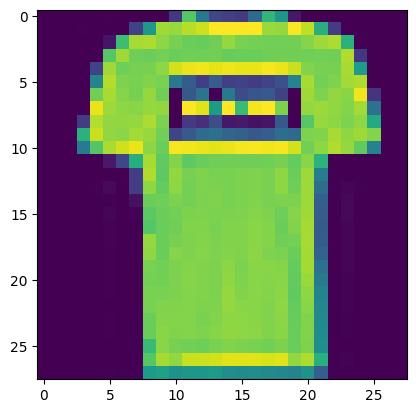

In [7]:
plt.imshow(x_train[1])
plt.show()

In [9]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
x_train.shape

(60000, 28, 28)

#### I'll just scale the inputs first and add an additional axis for channel

In [244]:
scale_x_train=x_train/255
scale_x_test=x_test/255
scale_x_train=scale_x_train[...,np.newaxis]
scale_x_test=scale_x_test[...,np.newaxis]

##### I tried a single convolutional layer but it wasn't enough to capture the complexity of Fashion-MNIST images. 
##### Therefore, I used two Conv2D layers to learn better features (maybe shapes,edges), each with 3×3 kernels and
##### 2×2 max pooling for controlled downsampling. Batch Normalization is applied to stabilize training. The dense 
##### layers reduce dimensionality (256 → 64) slowly to avoid a suddent jump and bottleneck, Also Dropout is used to avoid 
##### overfitting.


In [246]:
model=Sequential([
                Conv2D(64, (3,3), padding="same", activation="relu", input_shape=(28,28,1)),
                BatchNormalization(),
                MaxPooling2D((2,2)),
                Conv2D(64, (3,3), padding="same", activation="relu"),
                BatchNormalization(),
                MaxPooling2D((2,2)),
                Flatten(),
                Dense(units=256,activation="relu"),
                Dropout(0.3),
                Dense(units=64,activation="relu"),
                Dropout(0.2),
                Dense(units=10,activation="softmax"),
])

In [236]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

##### I also augmented some data as before that it was saturating at 85-86% accuracy without augmentation
##### But for more boost I added some augmentation

In [237]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
details = model.fit(datagen.flow(scale_x_train, y_train, batch_size=32),epochs=15,validation_data=(scale_x_test,y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9074 - loss: 0.2517
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9101 - loss: 0.2513
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9095 - loss: 0.2485
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9105 - loss: 0.2474
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9122 - loss: 0.2447
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9101 - loss: 0.2458
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9128 - loss: 0.2388
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9115 - loss: 0.2427
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9125 - loss: 0.2411
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9141 - loss: 0.2384
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9141 - loss: 0.2346
Epoch 12

In [238]:
frame=pd.DataFrame(details.history)
frame

,accuracy,loss
0,0.907383,0.251694
1,0.910150,0.251259
2,0.909517,0.248519
3,0.910483,0.247408
4,0.912250,0.244682
5,0.910083,0.245849
6,0.912817,0.238777
7,0.911500,0.242717
8,0.912517,0.241064
9,0.914117,0.238436


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'loss')]

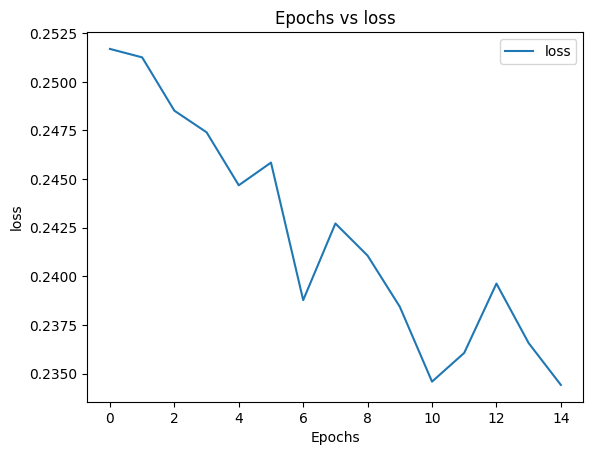

In [239]:
gra=frame.plot(y="loss",title="Epochs vs loss",)
gra.set(xlabel="Epochs",ylabel="loss")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'accuracy')]

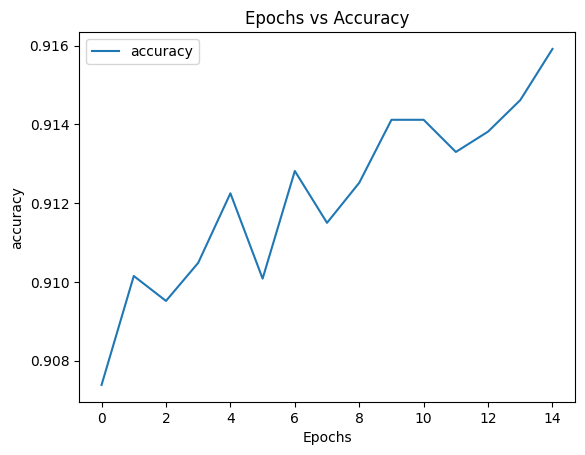

In [240]:
frame2=frame.plot(y="accuracy",title="Epochs vs Accuracy")
frame2.set(xlabel="Epochs",ylabel="accuracy")

In [242]:
model.evaluate(scale_x_test,y_test,batch_size=32,verbose=3)

[0.3392919600009918, 0.8949999809265137]

## 89\% accuracy ?!?!

### That's Good man

Answer : Sandal


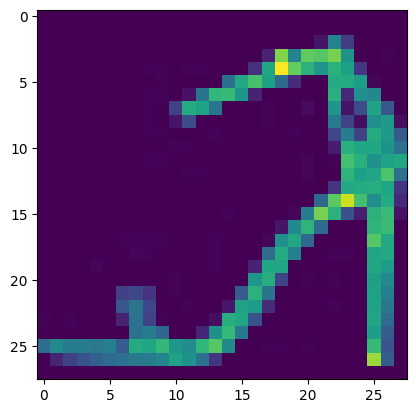

In [336]:
random_inx = np.random.choice(scale_x_test.shape[0])
test_image = scale_x_test[random_inx,:]
print(f"Answer : {labels[y_test[random_inx]]}")
plt.imshow(test_image)
plt.show()